#### Given a bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.Dataset Description: The case study is from an open-source dataset from Kaggle.The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.Link to the Kaggle project: https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

Perform following steps:
1. Read the dataset.
2. Distinguish the feature and target set and divide the data set into training and test sets.
3. Normalize the train and test data. 
4. Initialize and build the model. Identify the points of improvement and implement the same. 
5. Print the accuracy score and confusion matrix (5 points).

In [14]:
import pandas as pd 
import numpy as np 

In [15]:
df = pd.read_csv("Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [17]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [18]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [20]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [21]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [22]:
df = df.drop('Surname', axis=1)
df.columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

Using `LabelEncoder` For Converting The Object Type To Integer

In [23]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

In [24]:
df['Geography'] = LE.fit_transform(df['Geography'])
df['Geography'].unique()

array([0, 2, 1])

In [25]:
df['Gender'] = LE.fit_transform(df['Gender'])
df['Gender'].unique()

array([0, 1])

In [26]:
df

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [27]:
df.dtypes

RowNumber            int64
CustomerId           int64
CreditScore          int64
Geography            int32
Gender               int32
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [28]:
df.shape

(10000, 13)

In [29]:
df = df.drop('RowNumber', axis=1)
df = df.drop('CustomerId', axis=1)

In [30]:
import seaborn as sns

In [31]:
df.corr()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.001369,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


Showing The Correlation Matrix using HeatMap

<Axes: >

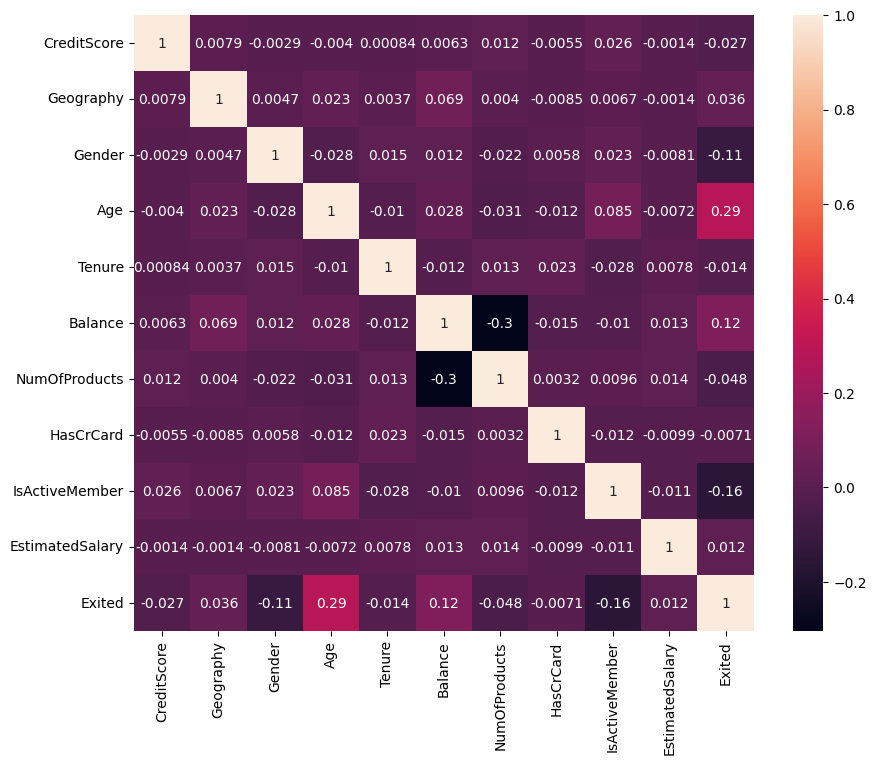

In [34]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,8))

sns.heatmap(df.corr(),annot=True,)

<Axes: >

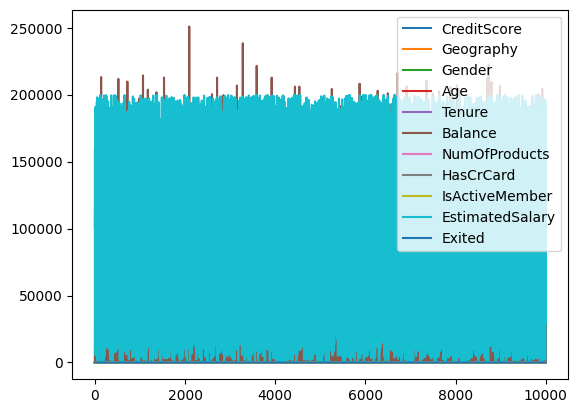

In [35]:
df.plot()

Using `RobustScaler` 

In [38]:
from sklearn.preprocessing import RobustScaler

sc = RobustScaler()

In [40]:
x= df.drop('Exited', axis=1)
y = df['Exited']

In [41]:
x_scaled = sc.fit_transform(x)
x_scaled

array([[-0.24626866,  0.        , -1.        , ...,  0.        ,
         0.        ,  0.0117391 ],
       [-0.32835821,  2.        , -1.        , ..., -1.        ,
         0.        ,  0.12551225],
       [-1.11940299,  0.        , -1.        , ...,  0.        ,
        -1.        ,  0.13962999],
       ...,
       [ 0.42537313,  0.        , -1.        , ..., -1.        ,
         0.        , -0.59061507],
       [ 0.89552239,  1.        ,  0.        , ...,  0.        ,
        -1.        , -0.07425228],
       [ 1.04477612,  0.        , -1.        , ...,  0.        ,
        -1.        , -0.63020194]])

Spliting The Dataset

In [42]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,random_state=54,test_size=0.30)

Using `LogisticRegression` Model because Output Column has Categorical Data

In [43]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [44]:
y_pred = lr.predict(x_test)

Checking Performance Of `LogisticRegression` 

In [45]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,confusion_matrix

In [46]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[2352,   69],
       [ 468,  111]], dtype=int64)

In [47]:
print("Accuracy: ",accuracy_score(y_test,y_pred))

Accuracy:  0.821


In [48]:
print("Precision: ",precision_score(y_test,y_pred))

Precision:  0.6166666666666667


In [49]:
print("Recall Score: ",recall_score(y_test,y_pred))

Recall Score:  0.19170984455958548


In [50]:
print("Fl Score:",f1_score(y_test,y_pred))

Fl Score: 0.2924901185770751


Training and Testing Model Using `DecisionTreeClassifier`

In [51]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [54]:
dtc_y_pred = dtc.predict(x_test)

Checking Preformance of `DecisionTreeClassifier`

In [55]:
cm = confusion_matrix(y_test,dtc_y_pred)
cm

array([[2084,  337],
       [ 284,  295]], dtype=int64)

In [56]:
print("Accuracy: ",accuracy_score(y_test,dtc_y_pred))

Accuracy:  0.793


In [57]:
print("Precision: ",precision_score(y_test,dtc_y_pred))

Precision:  0.46677215189873417


In [58]:
print("Recall Score: ",recall_score(y_test,dtc_y_pred))

Recall Score:  0.5094991364421416


In [59]:
print("Fl Score:",f1_score(y_test,dtc_y_pred))

Fl Score: 0.48720066061106526


In [60]:
df.Balance

0            0.00
1        83807.86
2       159660.80
3            0.00
4       125510.82
          ...    
9995         0.00
9996     57369.61
9997         0.00
9998     75075.31
9999    130142.79
Name: Balance, Length: 10000, dtype: float64

In [61]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

As The Dataset Is Not Balanced. So, Balanced The Dataset Which Will Increase The Value Of Your Performance Evaluation. 
And from this we understood that when the dataset is not balanced then `accuracy_score` will give incorrect answer. And balancing of dataset is important and don't dependent on `accuracy_score` also check `precision_score`, `recall_score`, `f1_score`.

Balancing The Dataset

In [64]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
x_sampled,y_sampled = ros.fit_resample(x,y)
y_sampled.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

Using Multilayer Perceptron i.e. `MLPClassifier`

In [66]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(100,100,100),activation='tanh',random_state=54,max_iter=(100))
clf.fit(x_train,y_train)
clf_y_pred = clf.predict(x_test)

C:\Users\tejas\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [67]:
cm = confusion_matrix(y_test,clf_y_pred)
cm

array([[2284,  137],
       [ 279,  300]], dtype=int64)

In [68]:
print("Accuracy: ",accuracy_score(y_test,clf_y_pred))

Accuracy:  0.8613333333333333


In [69]:
print("Precision: ",precision_score(y_test,clf_y_pred))

Precision:  0.6864988558352403


In [70]:
print("Recall Score: ",recall_score(y_test,clf_y_pred))

Recall Score:  0.5181347150259067


In [71]:
print("Fl Score:",f1_score(y_test,clf_y_pred))

Fl Score: 0.5905511811023622


In [72]:
x_sampled_train,x_sampled_test,y_sampled_train,y_sampled_test = train_test_split(x_sampled,y_sampled,random_state=54,test_size=0.30)

In [73]:
clf.fit(x_sampled_train,y_sampled_train)
clf_y_pred = clf.predict(x_sampled_test)

In [74]:
cm = confusion_matrix(y_sampled_test,clf_y_pred)
cm

array([[ 949, 1461],
       [ 583, 1785]], dtype=int64)

In [75]:
print("Accuracy: ",accuracy_score(y_sampled_test,clf_y_pred))

Accuracy:  0.5722059439095856


In [76]:
print("Precision: ",precision_score(y_sampled_test,clf_y_pred))

Precision:  0.5499075785582255


In [77]:
print("Recall Score: ",recall_score(y_sampled_test,clf_y_pred))

Recall Score:  0.7538006756756757


In [78]:
print("Fl Score:",f1_score(y_sampled_test,clf_y_pred))

Fl Score: 0.6359102244389028
